# Move Function

Now that you know how a robot uses sensor measurements to update its idea of its own location, let's see how we can incorporate motion into this location. In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing, moving and updating that distribution.

We include the `sense` function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green. 

Next, you're tasked with writing a function `move` that incorporates motion into the distribution. As seen below, **one motion `U= 1` to the right, causes all values in a distribution to shift one grid cell to the right.**

<img src='images/motion_1.png' width=50% height=50% />


First let's include our usual resource imports and display function.

In [1]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [2]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')


You are given the initial variables and the complete `sense` function, below.

In [3]:
# given initial variables
p=[0, 1, 0, 0, 0]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'red'
pHit = 0.6
pMiss = 0.2

# You are given the complete sense function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns a *normalized* distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    q=[]
    # loop through all grid cells
    for i in range(len(p)):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
        
    # sum up all the components
    s = sum(q)
    # divide all elements of q by the sum to normalize
    for i in range(len(p)):
        q[i] = q[i] / s
    return q

# Commented out code for measurements
# for k in range(len(measurements)):
#     p = sense(p, measurements)


### QUIZ: Program a function that returns a new distribution q, shifted to the right by the motion (U) units. 

This function should shift a distribution with the motion, U. Keep in mind that this world is cyclic and that if U=0, q should be the same as the given p. You should see all the values in `p` are moved to the right by 1, for U=1.

[0, 0, 1, 0, 0]


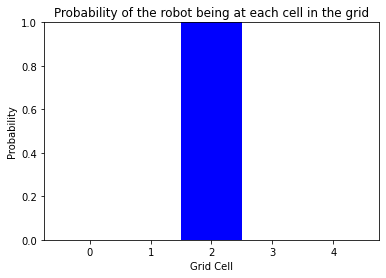

In [4]:
## TODO: Complete this move function so that it shifts a probability distribution, p
## by a given motion, U
def move(p, U):
    q=[]
    # iterate through all values in p
    for i in range(len(p)):
        # use the modulo operator to find the new location for a p value
        # this finds an index that is shifted by the correct amount
        index = (i-U) % len(p)
        # append the correct value of p to q
        q.append(p[index])
    return q

p = move(p,1)
print(p)
display_map(p)